In [28]:
library(tidyverse)
library(janitor)
library(repr)
require(gridExtra)

Loading required package: gridExtra




Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [10]:
injuries <- read_csv("data/motor-vehicle-serious-injuries-with-speeding-involvement.csv") |> clean_names()
tail(injuries)

Rows: 28 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SPEEDING INVOLVED
dbl (2): YEAR, SERIOUS INJURIES

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,speeding_involved,serious_injuries
<dbl>,<chr>,<dbl>
2015,N,1417
2015,Y,366
2016,N,1468
2016,Y,406
2017,N,1353
2017,Y,399


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


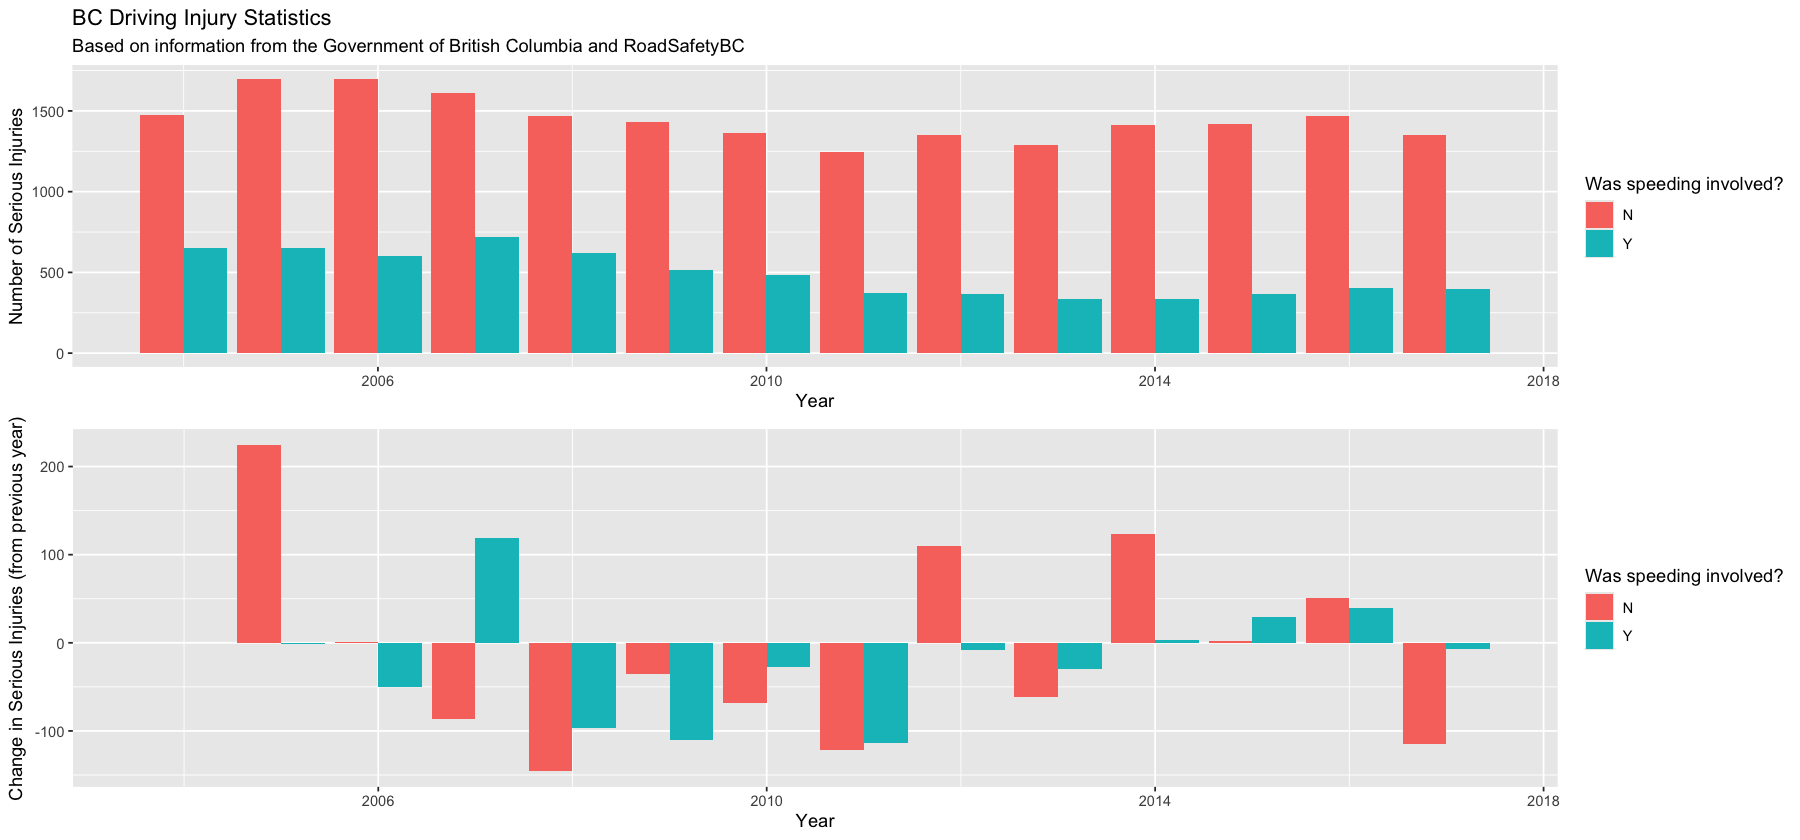

In [34]:
injuries_plot <- injuries |>
    ggplot(aes(x=year, y=serious_injuries, fill=speeding_involved)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x="Year", y="Number of Serious Injuries", fill="Was speeding involved?", subtitle = "Based on information from the Government of British Columbia and RoadSafetyBC") +
        ggtitle("BC Driving Injury Statistics")
options(repr.plot.width = 15)

# injuries_plot

changed_injuries_plot <- injuries |>
    group_by(speeding_involved) |>
    mutate(change = serious_injuries - lag(serious_injuries)) |> 
     ggplot(aes(x=year, y=change, fill=speeding_involved)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x="Year", y="Change in Serious Injuries (from previous year)", fill="Was speeding involved?")

# changed_injuries_plot

grid.arrange(injuries_plot, changed_injuries_plot, nrow=2)
